In [12]:
import os, sys
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import cartopy.crs as ccrs
import cmocean

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)
try:
    import general_io as gio
except ImportError:
    raise ImportError('Must run this script from anywhere within the ocean-analysis git repo')


In [57]:
# historical, historicalGHG, historicalMisc

file_dict = {}

## CMIP6

file_dict['BCC-CSM2-MR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Ayr/pe/gn/v20181126/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-GHG/r1i1p1f1/Ayr/pe/gn/v20190426/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-aer/r1i1p1f1/Ayr/pe/gn/v20190507/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-aer_r1i1p1f1_gn_185001-202012-cumsum.nc']

# CanESM5: r10i1p1f1 available for hist-GHG, r1i1p1f1 for hist-aer
# CNRM-CERFACS: Missing evspsbl control files (the first file): /g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/piControl/r1i1p1f2/Amon/evspsbl/gr/v20180814/
# FGOALS-g3: years missing in hist-aer and hist-GHG data

file_dict['IPSL-CM6A-LR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Ayr/pe/gr/v20180803/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-GHG/r1i1p1f1/Ayr/pe/gr/v20180914/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-GHG_r1i1p1f1_gr_185001-202012-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-aer/r1i1p1f1/Ayr/pe/gr/v20180914/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-aer_r1i1p1f1_gr_185001-202012-cumsum.nc']


## CMIP5

file_dict['CanESM2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Oyr/pe/gn/v20120718/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Oyr/pe/gn/v20111027/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Oyr/pe/gn/v20111028/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

file_dict['CCSM4'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCAR/CCSM4/historical/r1i1p1/Oyr/pe/gn/v20160829/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                      '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalGHG/r1i1p1/Oyr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                      '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalMisc/r1i1p10/Oyr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalMisc_r1i1p10_gn_185001-200512-cumsum.nc']

file_dict['CSIRO-Mk3-6-0'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historical/r1i1p1/Oyr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalGHG/r1i1p1/Oyr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/r1i1p4/Oyr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

file_dict['FGOALS-g2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/LASG-CESS/FGOALS-g2/historical/r1i1p1/Oyr/pe/gn/v1/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historical_r1i1p1_gn_185001-201412-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalGHG/r1i1p1/Oyr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalMisc/r2i1p1/Oyr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalMisc_r2i1p1_gn_185001-200512-cumsum.nc']

file_dict['GFDL-CM3'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-CM3/historical/r1i1p1/Oyr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historical_r1i1p1_gn_186001-200512-cumsum.nc',
                         '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-CM3/historicalGHG/r1i1p1/Oyr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historicalGHG_r1i1p1_gn_186001-200512-cumsum.nc',
                         None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-CM3.historicalMisc.mon.atmos.Amon.r1i1p1.v20120227

file_dict['GFDL-ESM2M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historical/r1i1p1/Oyr/pe/gn/v20111228/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                           '/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historicalGHG/r1i1p1/Oyr/pe/gn/v20130214/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                           None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-ESM2M.historicalMisc.mon.atmos.Amon.r1i1p5.v20130214

file_dict['GISS-E2-H'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-H/historical/r1i1p1/Oyr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalGHG/r1i1p1/Oyr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalMisc/r1i1p107/Oyr/pe/gn/v20160427/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalMisc_r1i1p107_gn_185001-200512-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-H.historicalMisc.mon.atmos.Amon.r1i1p310.v20160427

file_dict['GISS-E2-R'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-R/historical/r1i1p1/Oyr/pe/gn/v20160502/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalGHG/r1i1p1/Oyr/pe/gn/v20160429/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalMisc/r1i1p310/Oyr/pe/gn/v20160503/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalMisc_r1i1p310_gn_185001-201212-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-R.historicalMisc.mon.atmos.Amon.r1i1p107.v20160503

file_dict['IPSL-CM5A-LR'] = ['/g/data/r87/dbi599/CMIP5/CMIP/IPSL/IPSL-CM5A-LR/historical/r1i1p1/Oyr/pe/gn/v20110406/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP5/DAMIP/IPSL/IPSL-CM5A-LR/historicalGHG/r1i1p1/Oyr/pe/gn/v20120526/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                             None]
#dataset_id=cmip5.output1.IPSL.IPSL-CM5A-LR.historicalMisc.mon.atmos.Amon.r1i1p3.v20111119

file_dict['NorESM1-M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCC/NorESM1-M/historical/r1i1p1/Oyr/pe/gn/v20110901/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalGHG/r1i1p1/Oyr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalMisc/r1i1p1/Oyr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalMisc_r1i1p1_gn_185001-201212-cumsum.nc']

In [62]:
def get_data(infile, time_constraint):
    """Get the data for a particular model"""
    
    cube, history = gio.combine_files(infile, 'precipitation minus evaporation flux', new_calendar='365_day')
    #cube = iris.load_cube(infile, 'precipitation minus evaporation flux' & time_constraint)
    cube = cube.extract(time_constraint)
    iris.coord_categorisation.add_year(cube, 'time')
    anomaly_data = cube.data - cube.data[0, :]
    
    return cube, anomaly_data

In [59]:
def plot_data(model):
    """Create the plot"""

    output = []
    hist_file, ghg_file, aa_file = file_dict[model]
    time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])
    
    hist_cube, hist_anomaly_data = get_data(hist_file, time_constraint)
    ghg_cube, ghg_anomaly_data = get_data(ghg_file, time_constraint)
    if aa_file:
        aa_cube, aa_anomaly_data = get_data(aa_file, time_constraint)
    else:
        aa_cube = aa_anomaly_data = None
    
    fig = plt.figure(figsize=[16,12])
    ax0 = plt.subplot2grid((3,6), (0,2), colspan=2)
    ax1 = plt.subplot2grid(shape=(3,6), loc=(1,0), colspan=2)
    ax2 = plt.subplot2grid((3,6), (1,2), colspan=2)
    ax3 = plt.subplot2grid((3,6), (1,4), colspan=2)
    ax4 = plt.subplot2grid((3,6), (2,1), colspan=2)
    ax5 = plt.subplot2grid((3,6), (2,3), colspan=2)

    xvals = [0, 1, 2, 3, 4]
    ref_cube = iris.load_cube(hist_file, 'precipitation minus evaporation flux')
    ax0.bar(xvals, ref_cube.data[0, :], color='0.5')
    ax0.set_ylabel('kg')
    ax0.set_xticklabels(['', 'SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    ax0.set_title('Year One')

    hist_years = hist_cube.coord('year').points
    ghg_years = ghg_cube.coord('year').points
    if aa_cube:
        aa_years = aa_cube.coord('year').points
    
    max_value = np.abs(ghg_anomaly_data).max() * 1.1

    ax1.plot(ghg_years, ghg_anomaly_data[:,0], color='red', label='GHG-only')
    ax1.plot(hist_years, hist_anomaly_data[:,0], color='black', label='historical')
    if aa_cube:
        ax1.plot(aa_years, aa_anomaly_data[:,0], color='blue', label='AA-only')
    ax1.set_title('SH precip')
    ax1.set_ylabel('kg')
    ax1.set_ylim([-max_value, max_value])
    ax1.grid(True, color='0.8', linestyle='--')
    ax1.legend()

    ax4.plot(ghg_years, ghg_anomaly_data[:,1], color='red', label='GHG-only')
    ax4.plot(hist_years, hist_anomaly_data[:,1], color='black', label='historical')
    if aa_cube:
        ax4.plot(aa_years, aa_anomaly_data[:,1], color='blue', label='AA-only')
    ax4.set_title('SH evap')
    ax4.set_ylabel('kg')
    ax4.set_ylim([-max_value, max_value])
    ax4.grid(True, color='0.8', linestyle='--')

    ax2.plot(ghg_years, ghg_anomaly_data[:,2], color='red', label='GHG-only')
    ax2.plot(hist_years, hist_anomaly_data[:,2], color='black', label='historical')
    if aa_cube:
        ax2.plot(aa_years, aa_anomaly_data[:,2], color='blue', label='AA-only')
    ax2.set_title('tropical precip')
    ax2.set_ylim([-max_value, max_value])
    ax2.grid(True, color='0.8', linestyle='--')

    ax5.plot(ghg_years, ghg_anomaly_data[:,3], color='red', label='GHG-only')
    ax5.plot(hist_years, hist_anomaly_data[:,3], color='black', label='historical')
    if aa_cube:
        ax5.plot(aa_years, aa_anomaly_data[:,3], color='blue', label='AA-only')
    ax5.set_title('NH evap')
    ax5.set_ylim([-max_value, max_value])
    ax5.grid(True, color='0.8', linestyle='--')

    ax3.plot(ghg_years, ghg_anomaly_data[:,4], color='red', label='GHG-only')
    ax3.plot(hist_years, hist_anomaly_data[:,4], color='black', label='historical')
    if aa_cube:
        ax3.plot(aa_years, aa_anomaly_data[:,4], color='blue', label='AA-only')
    ax3.set_title('NH precip')
    ax3.set_ylim([-max_value, max_value])
    ax3.grid(True, color='0.8', linestyle='--')

    #ax3.set_yticks([])
    fig.tight_layout()
    plt.show()
    
    data = [[model, 'GHG-only', 'SH precip', ghg_anomaly_data[-1, 0]],
            [model, 'historical', 'SH precip', hist_anomaly_data[-1, 0]],
            [model, 'AA-only', 'SH precip', aa_anomaly_data[-1, 0] if aa_cube else None],
            [model, 'GHG-only', 'SH evap', ghg_anomaly_data[-1, 1]],
            [model, 'historical', 'SH evap', hist_anomaly_data[-1, 1]],
            [model, 'AA-only', 'SH evap', aa_anomaly_data[-1, 1] if aa_cube else None],
            [model, 'GHG-only', 'tropical precip', ghg_anomaly_data[-1, 2]],
            [model, 'historical', 'tropical precip', hist_anomaly_data[-1, 2]],
            [model, 'AA-only', 'tropical precip', aa_anomaly_data[-1, 2] if aa_cube else None],
            [model, 'GHG-only', 'NH evap', ghg_anomaly_data[-1, 3]],
            [model, 'historical', 'NH evap', hist_anomaly_data[-1, 3]],
            [model, 'AA-only', 'NH evap', aa_anomaly_data[-1, 3] if aa_cube else None],
            [model, 'GHG-only', 'NH precip', ghg_anomaly_data[-1, 4]],
            [model, 'historical', 'NH precip', hist_anomaly_data[-1, 4]],
            [model, 'AA-only', 'NH precip', aa_anomaly_data[-1, 4] if aa_cube else None]]
           
    df = pd.DataFrame(data, columns = ['model', 'experiment', 'region', 'change'])
    
    return df

In [60]:
df_dict = {}

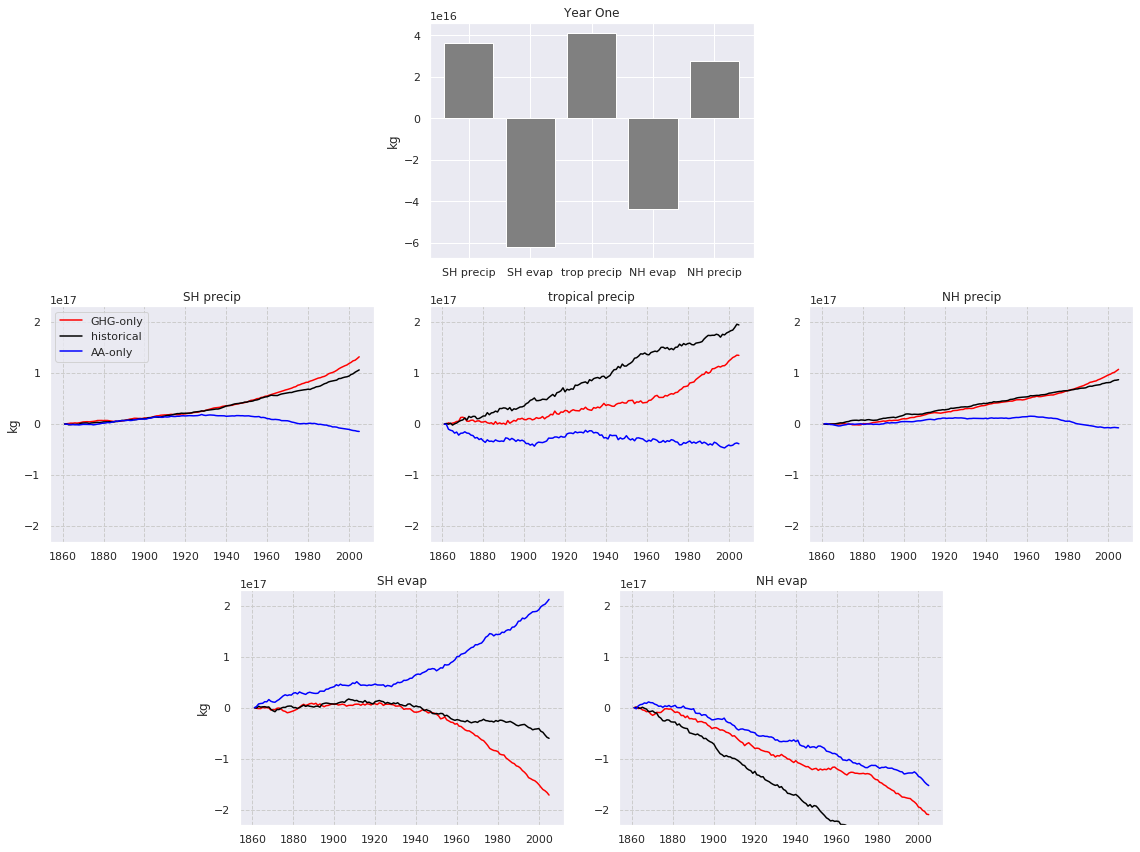

In [63]:
df_dict['BCC-CSM2-MR'] = plot_data('BCC-CSM2-MR')

**Figure.**  
Top panel: Annual region-integrated P-E for the first year of the historical experiment.  
Remaining panels: Cumulative region-integrated P-E anomaly for the GHG-only (red), AA-only (blue) and historical (black) experiments.

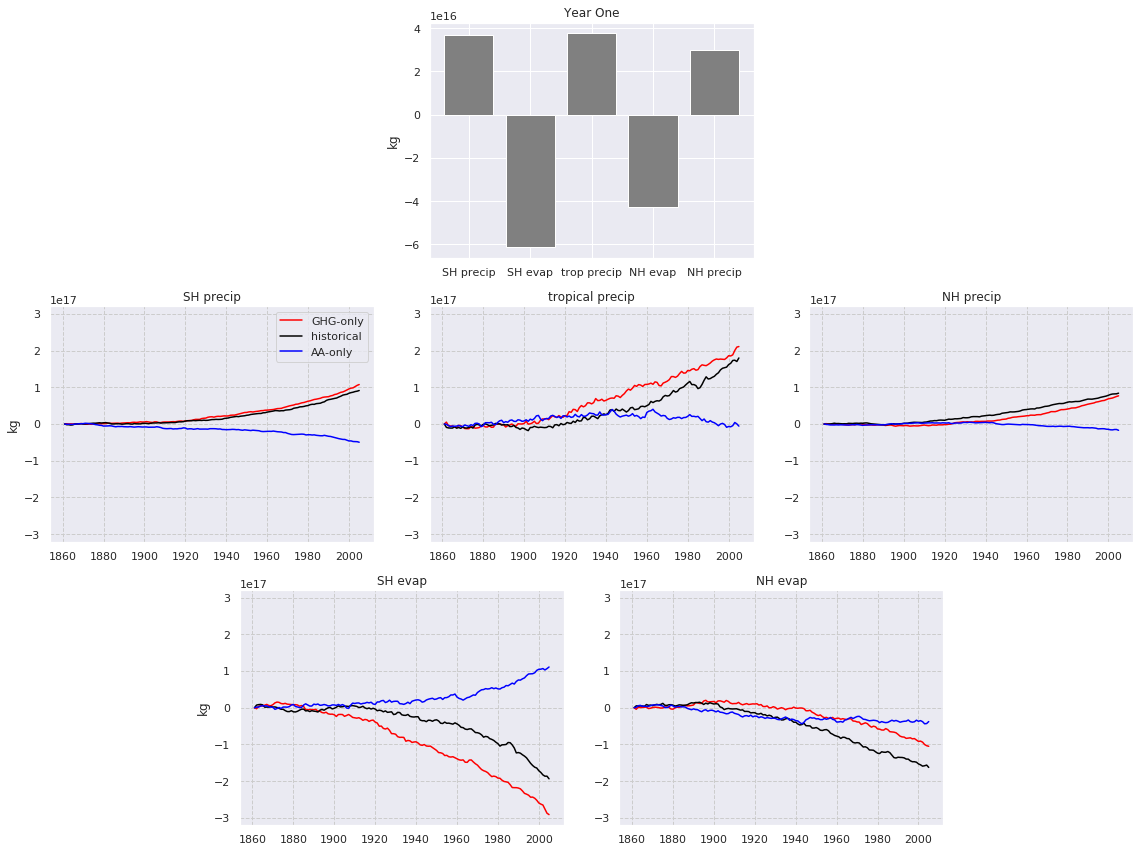

In [64]:
df_dict['IPSL-CM6A-LR'] = plot_data('IPSL-CM6A-LR')

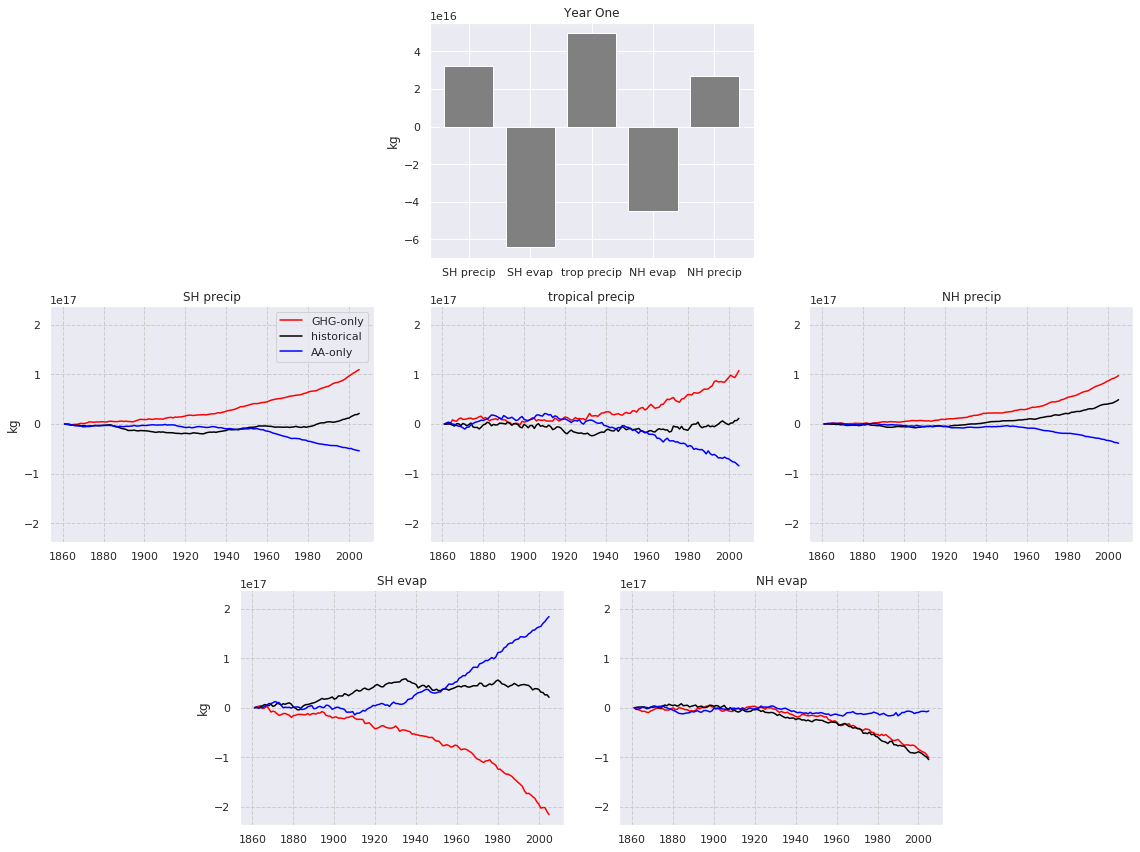

In [65]:
df_dict['CanESM2'] = plot_data('CanESM2')

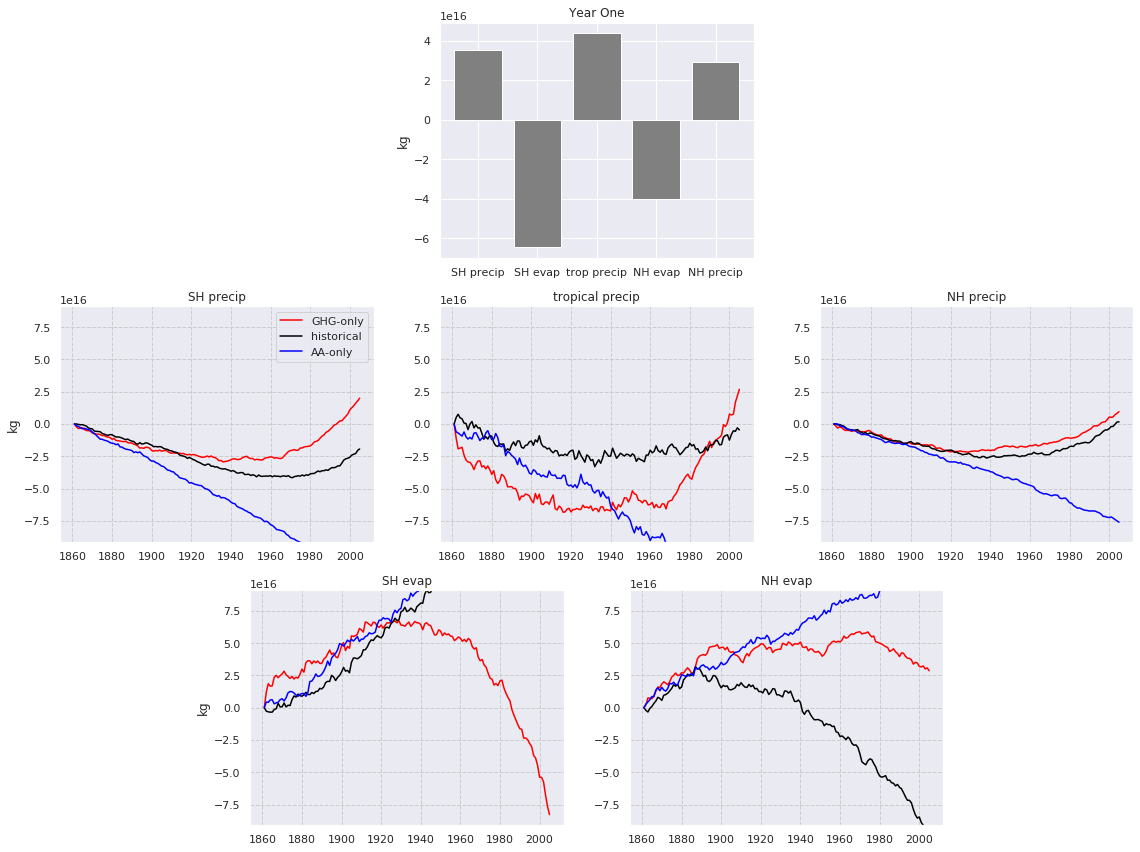

In [66]:
df_dict['FGOALS-g2'] = plot_data('FGOALS-g2')

Try removing the actual accumulated piControl, not a cubic fit? (Try some other models first and come back to this one.)

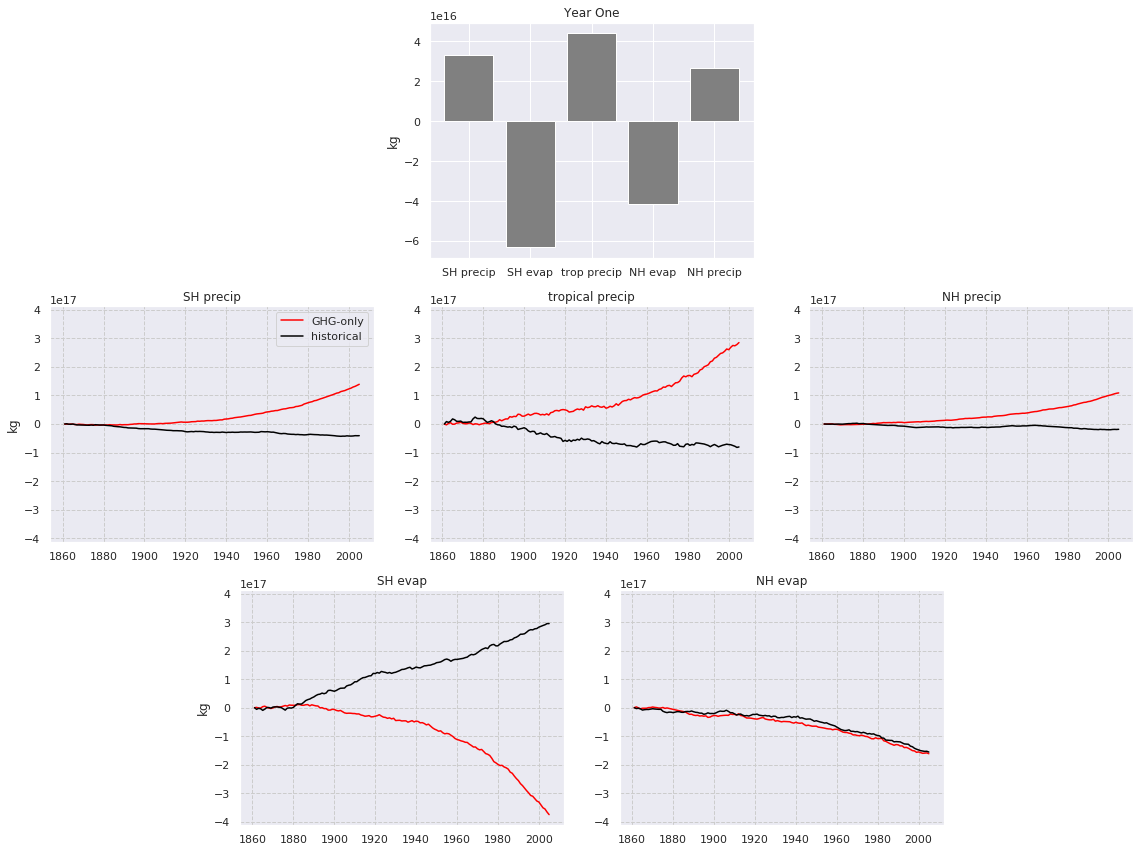

In [67]:
df_dict['GFDL-CM3'] = plot_data('GFDL-CM3')

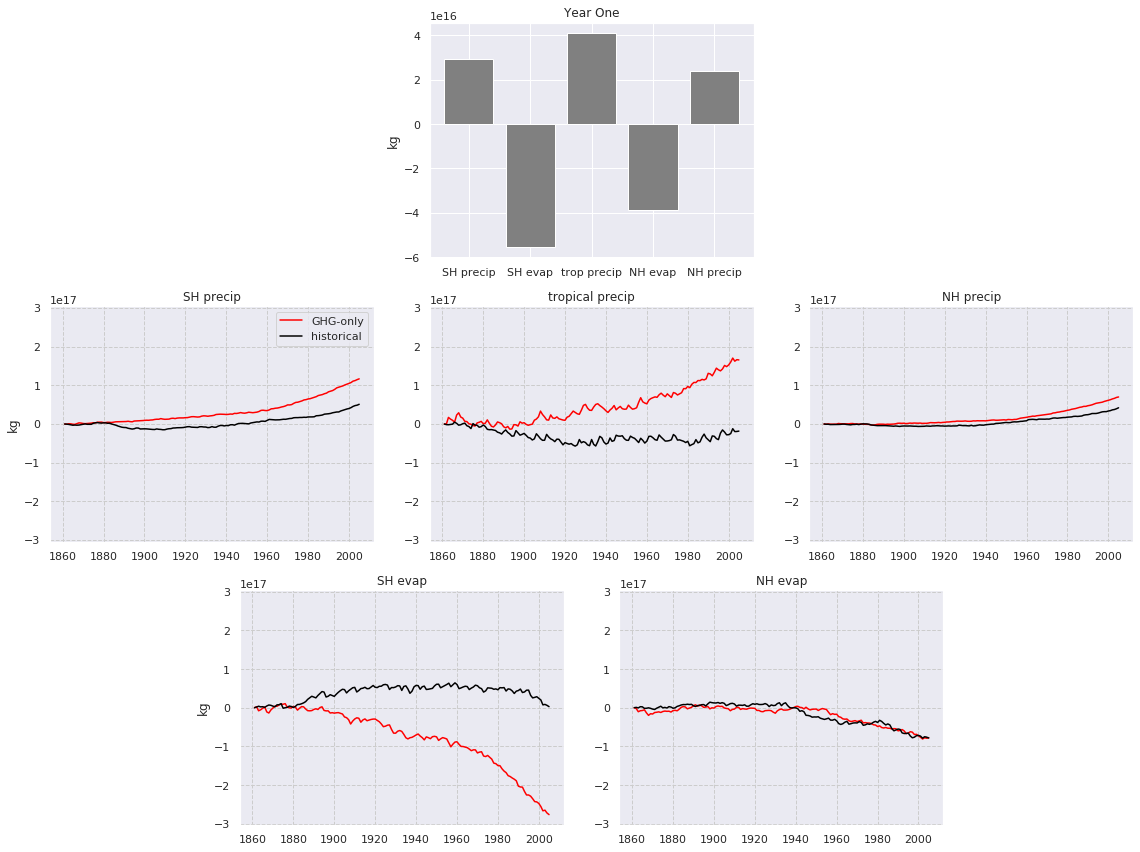

In [68]:
df_dict['GFDL-ESM2M'] = plot_data('GFDL-ESM2M')

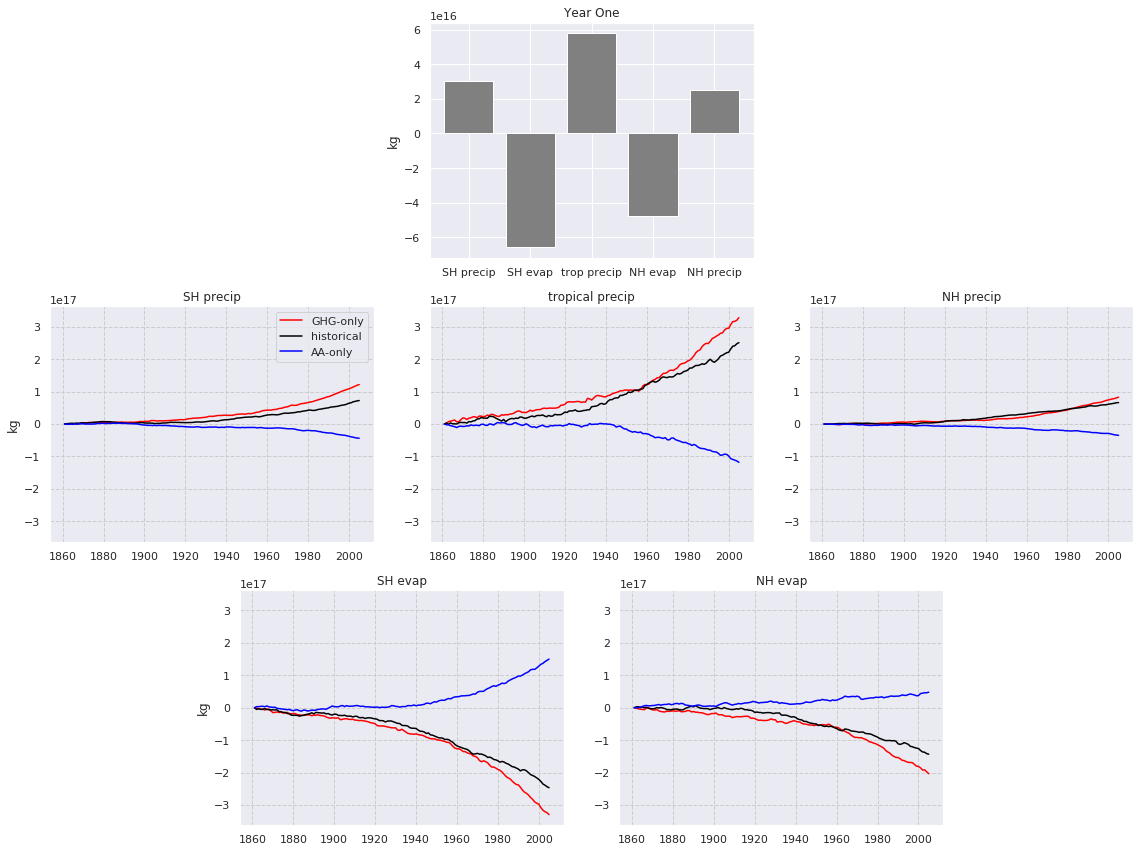

In [69]:
df_dict['GISS-E2-H'] = plot_data('GISS-E2-H')

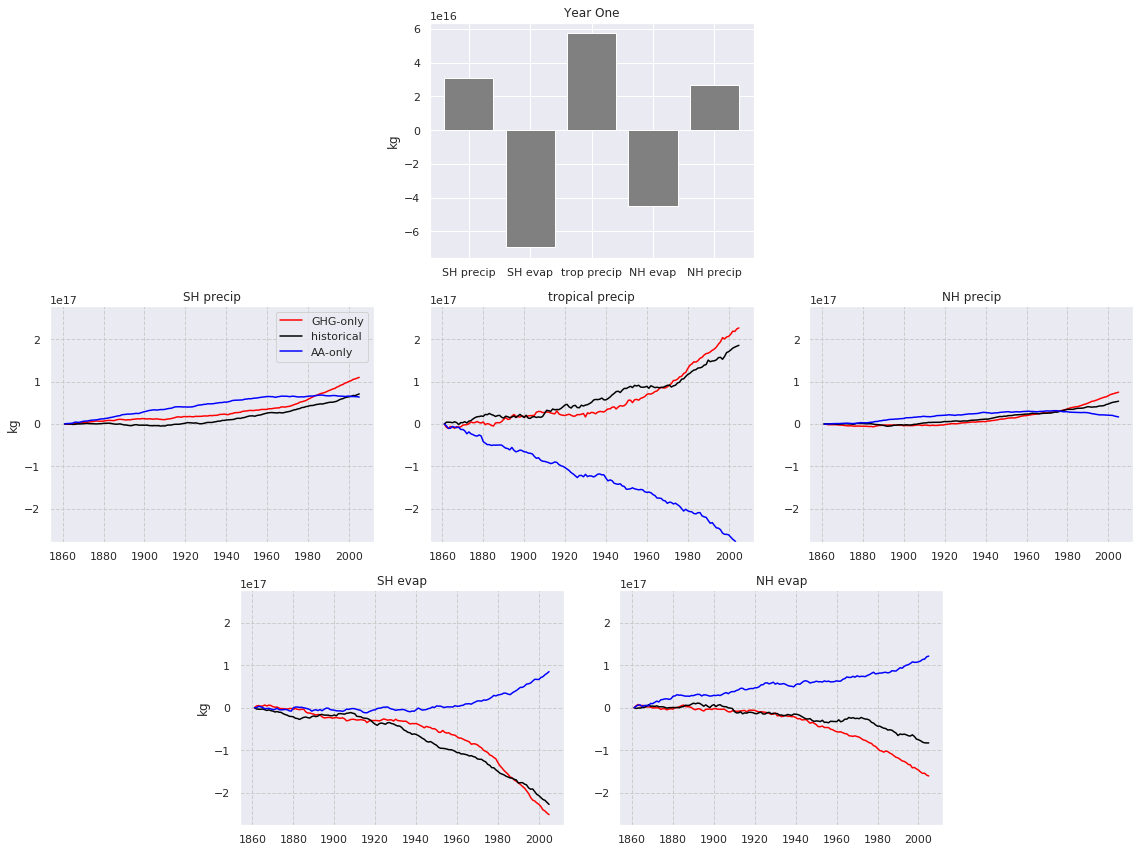

In [70]:
df_dict['GISS-E2-R'] = plot_data('GISS-E2-R')

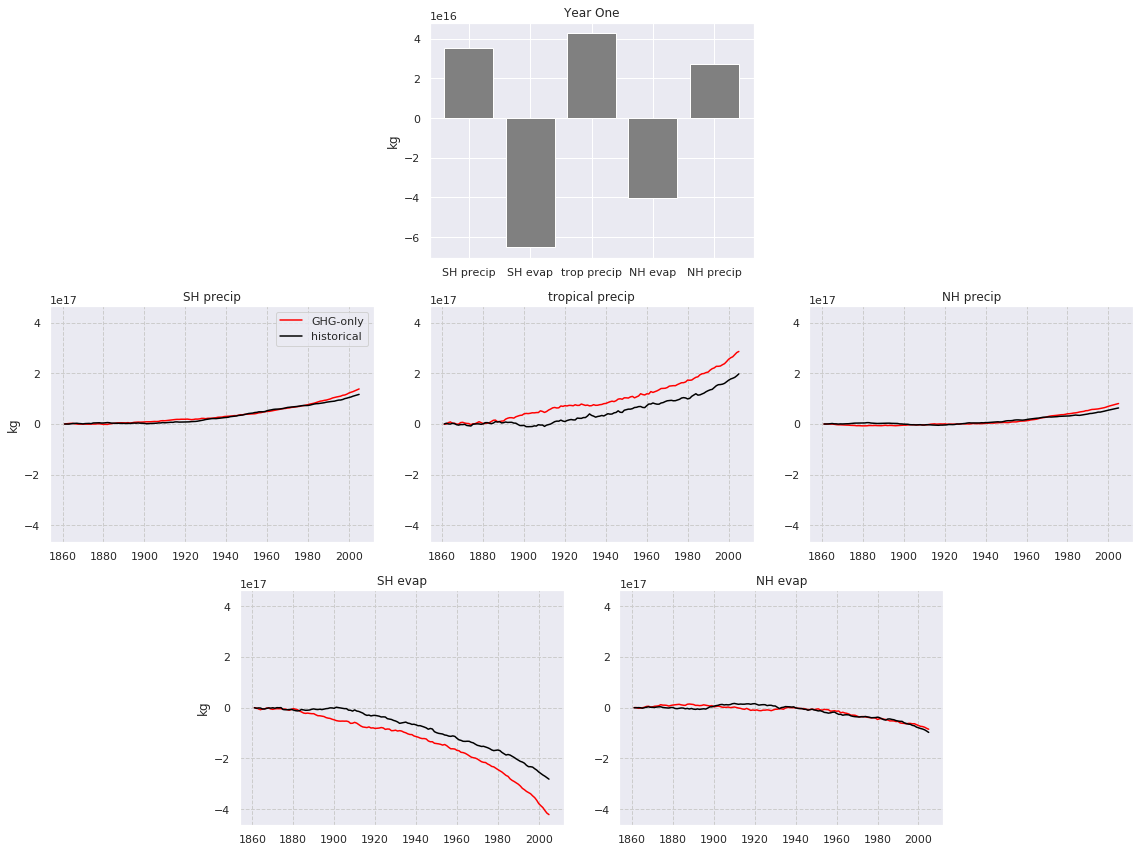

In [71]:
df_dict['IPSL-CM5A-LR'] = plot_data('IPSL-CM5A-LR')

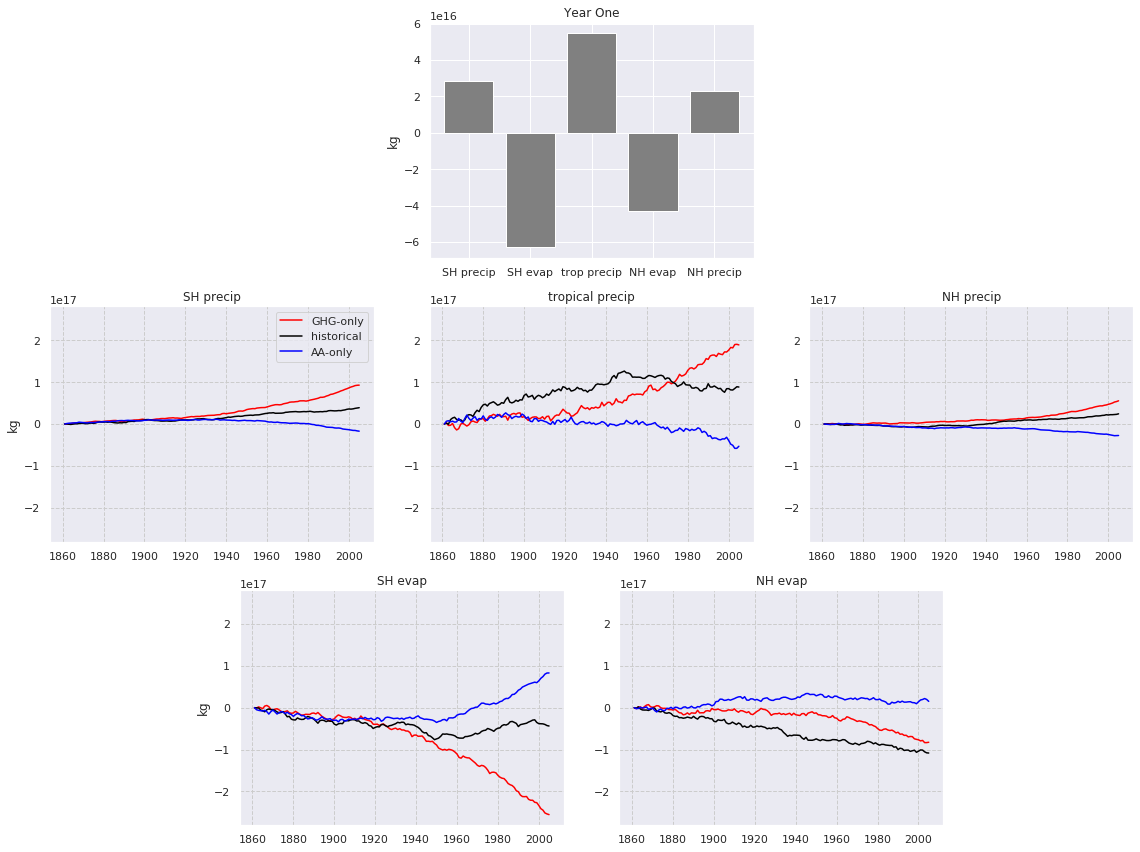

In [72]:
df_dict['NorESM1-M'] = plot_data('NorESM1-M')

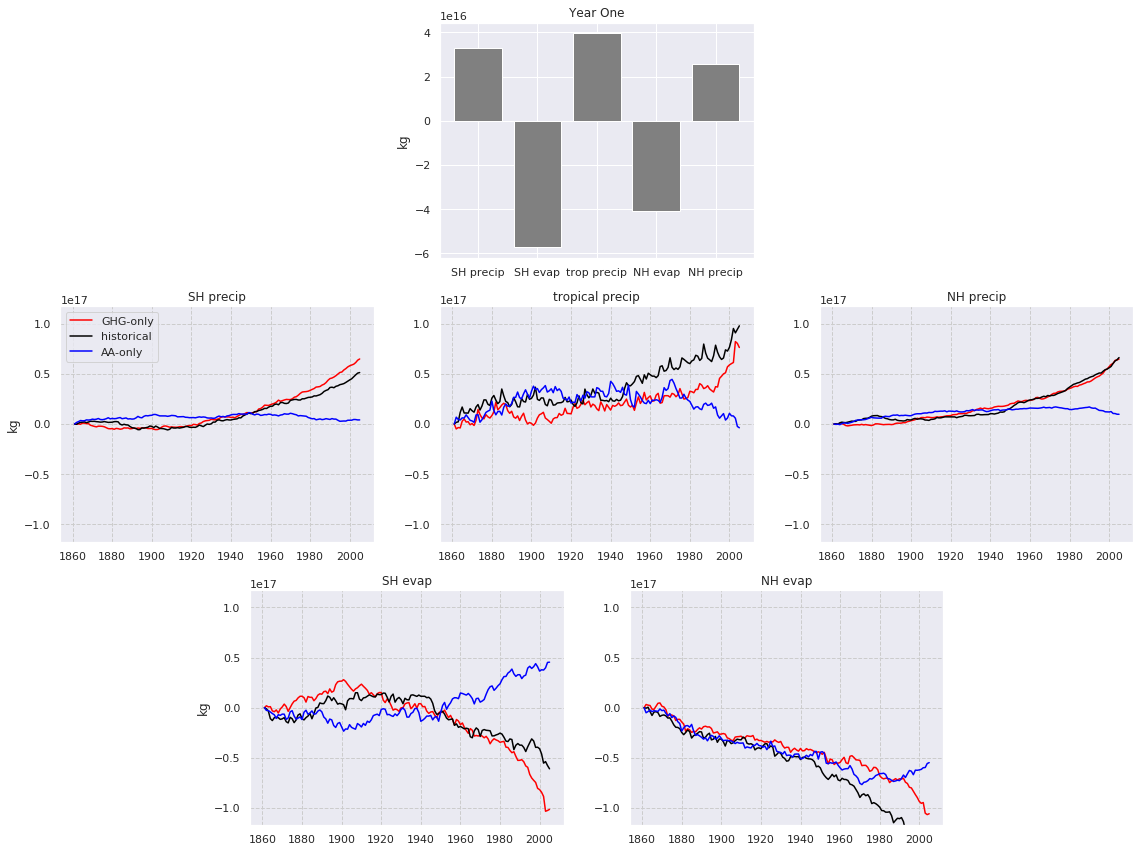

In [73]:
df_dict['CCSM4'] = plot_data('CCSM4')

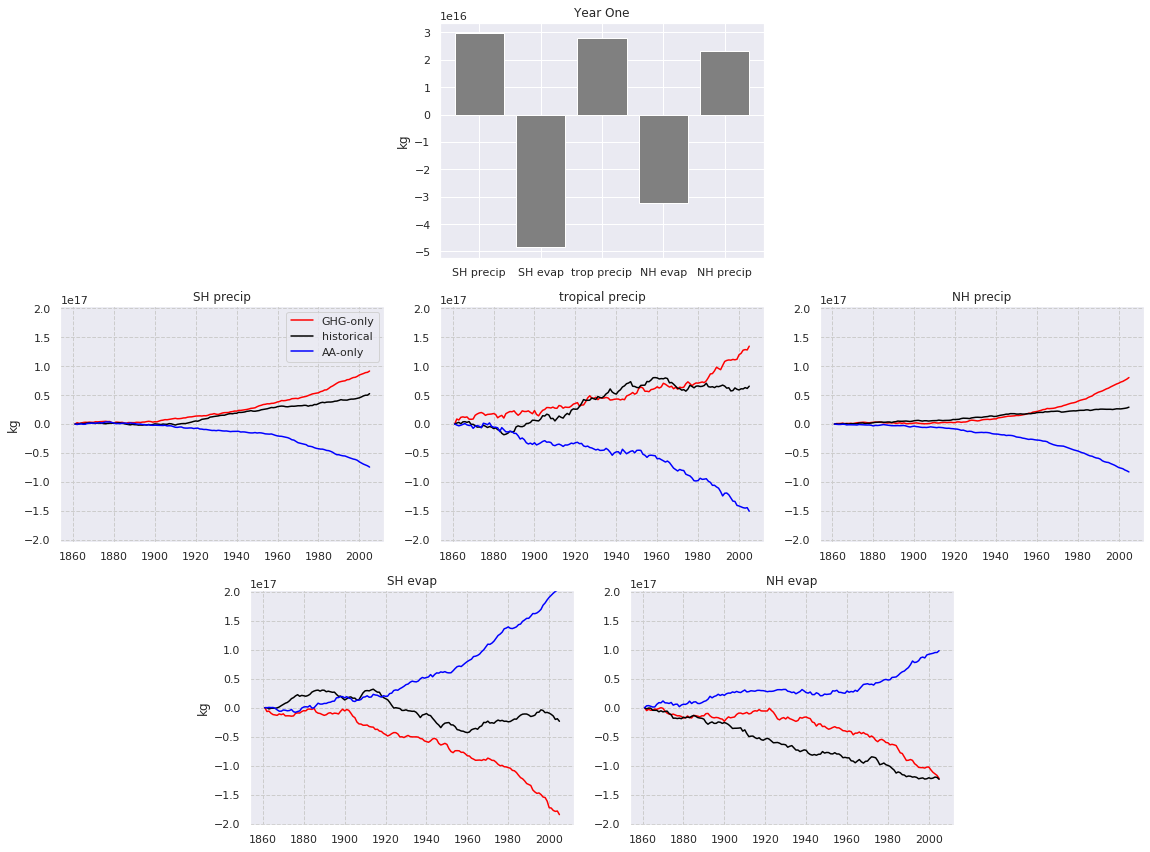

In [74]:
df_dict['CSIRO-Mk3-6-0'] = plot_data('CSIRO-Mk3-6-0')

In [83]:
full_model_list = ['BCC-CSM2-MR', 'IPSL-CM6A-LR',
                   'CanESM2', 'GFDL-CM3', 'GFDL-ESM2M',
                   'GISS-E2-H', 'GISS-E2-R', 'IPSL-CM5A-LR',
                   'NorESM1-M', 'CCSM4', 'CSIRO-Mk3-6-0']

restricted_model_list = ['BCC-CSM2-MR', 'IPSL-CM6A-LR',
                        'CanESM2',
                        'GISS-E2-H', 'GISS-E2-R',
                        'NorESM1-M', 'CCSM4', 'CSIRO-Mk3-6-0']

In [87]:
def create_df(model_list):
    """Create a dataframe for a list of models"""

    df = df_dict[model_list[0]]
    for model in model_list[1:]:
        df = df.append(df_dict[model], ignore_index=True)
    df['change_sign_fix'] = df['change'].where((df['region'] == 'SH precip') | (df['region'] == 'tropical precip') | (df['region'] == 'NH precip'), df['change'] * -1)
        
    return df

In [88]:
df_full = create_df(full_model_list)
df_full

,model,experiment,region,change,change_sign_fix
0,BCC-CSM2-MR,GHG-only,SH precip,1.317750e+17,1.317750e+17
1,BCC-CSM2-MR,historical,SH precip,1.060718e+17,1.060718e+17
2,BCC-CSM2-MR,AA-only,SH precip,-1.460218e+16,-1.460218e+16
3,BCC-CSM2-MR,GHG-only,SH evap,-1.713461e+17,1.713461e+17
4,BCC-CSM2-MR,historical,SH evap,-6.006727e+16,6.006727e+16
...,...,...,...,...,...
160,CSIRO-Mk3-6-0,historical,NH evap,-1.236678e+17,1.236678e+17
161,CSIRO-Mk3-6-0,AA-only,NH evap,9.838909e+16,-9.838909e+16
162,CSIRO-Mk3-6-0,GHG-only,NH precip,8.024655e+16,8.024655e+16
163,CSIRO-Mk3-6-0,historical,NH precip,2.908332e+16,2.908332e+16


In [93]:
df_subset = create_df(restricted_model_list)

In [80]:
def plot_ensemble(df):
    """Plot the ensemble results"""
    
    fig, ax = plt.subplots(1, 1, figsize=[12, 8])
    sns.set(style="darkgrid")
    #sns.swarmplot(x="Region", y="Change", hue="Experiment",
    #              data=df, ax=axes, palette='hot')
    my_pal = {"GHG-only": "tab:red", "historical": "tab:gray", "AA-only":"tab:blue"}
    sns.boxplot(x="region", y="change_sign_fix", hue="experiment",
                data=df, ax=ax, palette=my_pal)
    ax.set_ylabel('Accumulated P-E anomaly (kg)')
    plt.show()

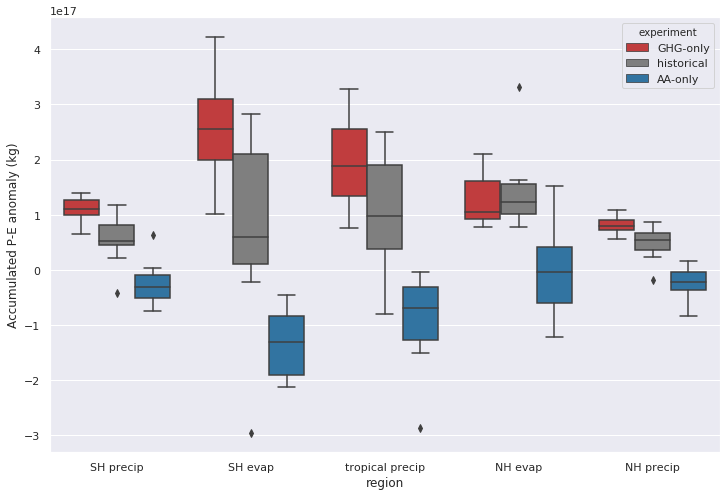

In [90]:
plot_ensemble(df_full)

**Figure.** Accumulated P-E anomaly over the period 1861-2005. Each box shows the ensemble quartiles, while the whiskers extend to show the rest of the distribution, except for points determined to be outliers using a method that is a function of the inter-quartile range. Positive values indicate an increase in precipitation in the precipitation dominated regions and an increase in evaporation in the evaporation dominated regions (i.e. evaporative regions have been multiplied by -1). 

In [92]:
#plot_ensemble(df_subset)

In [3]:
pe_file = '/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/pe/gn/v20181126/pe_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc'

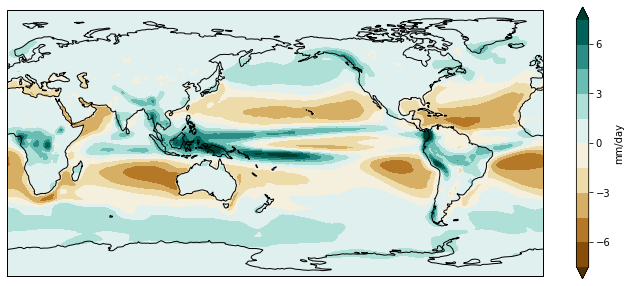

In [14]:
dset = xr.open_dataset(pe_file)

clim = dset['pe'].mean('time', keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(ax=ax,
                   levels=np.arange(-7.5, 7.501, 1.5),
                   extend='both',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap='BrBG')
ax.coastlines()
plt.show()